In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time, os, sys, gc


import h5py 

import svgutils.transform as sg 
import sys 

import matplotlib.patches as patches

from scipy.integrate import solve_ivp

import class_energy as energy
import class_equations_of_motion as eom 

import class_handle_input as h_in
import class_handle_wavefunctions as h_wavef

import class_visualization as vis
import class_mass_size as mass_size

In [15]:
def get_E_arr(Mx_list, My_list, folder, check_sys):
    h5_io_object = h_in.io_hdf5()
    
    E_s_arr = np.zeros(len(Mx_list), dtype=complex)
    for i in range(len(Mx_list)):
        Mx = Mx_list[i]
        My = My_list[i]

        check_sym = 'Mx_'+str(Mx)+'_My_'+str(My)
        file_list = [f for f in os.listdir(folder) if check_sys in f and check_sym in f]

        if len(file_list) > 1: 
            break
        for file in file_list:
            file_name = folder+file
            psi, params = h5_io_object.get_psi(file_name)

            energy_object = energy.energy(params=params)
            E, E_T, E_B, E_V = energy_object.calc_energy(psi)
            E_s_arr[i] = E
    return E_s_arr

In [16]:
def plot_rotor_wavefunction(x, chosen_My, chosen_Mx, psi):
    A = 6
    plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
    ##plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    #plt.rc('text.latex', preambler=r'\usepackage{textgreek}')
    font_size = 18 

    fig, axs = plt.subplots(chosen_My,chosen_Mx, subplot_kw=dict(polar=True))
    #plt.suptitle(r'$V_0 =$'+str(V_0), fontsize=font_size)

    for i in range(chosen_My):
         for j in range(chosen_Mx):
            #axs[i, j].plot(x, psi[(i+int(chosen_My/2))%chosen_My,(j+int(chosen_My/2))%chosen_My], color='lightcoral')

            axs[i, j].plot(x, psi[(i+int(chosen_My/2))%chosen_My,(j+int(chosen_Mx/2))%chosen_Mx], color='lightcoral')


            axs[i, j].set_yticklabels([])
            axs[i, j].set_xticklabels([])
            axs[i, j].set_theta_zero_location('E')

            axs[i, j].grid(linewidth=0.5)
            axs[i, j].spines['polar'].set_linewidth(0.3) #.set_visible(False)

    #axs[0, 0].set_theta_zero_location('E')
    #lines, labels = axs[0, 0].set_thetagrids((0, 45, 90, 135, 180), (r'0', ' ', r'$\pi/2$', ' ', r'$\pi$'))

In [17]:
params = {"n": 256,
"M": 36,
"Mx": 6,
"Mx_display": 4,
"converge_new_lattice": "no",
"My": 6,
"My_display": 4,
"B": 1.0,
"tx": 100,
"ty": 100,
"V_0": 150.0,
"qx": 0,
"qy": 0,
"init_choice": "uniform",
"external_wf_tag": " ",
"excitation_no": 11,
"angle_pattern": [0,0,0,0],
"V_0_pattern": [0,0,0,0],
"n_states": 0,
"path_to_input_wavefunction": " ",
"dt": 0.001,
"tol": 1e-7}

x = (2*np.pi/params["n"])*np.arange(params["n"])

''' 
I/O Objects
'''
h5_io_object = h_in.io_hdf5()

check_sys = 'tx_'+str(params["tx"])+'_ty_'+str(params["ty"])+'_V0_'+str(params["V_0"])

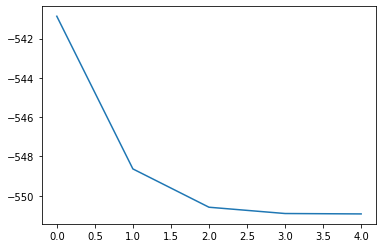

In [18]:
Mx_list = 2**(np.arange(2,7))
My_list = 2**(np.arange(2,7))

folder = 'results/numerics_verification/fo/'

E_size_fo_arr = get_E_arr(Mx_list, My_list, folder, check_sys)
plt.plot(E_size_fo_arr.real)

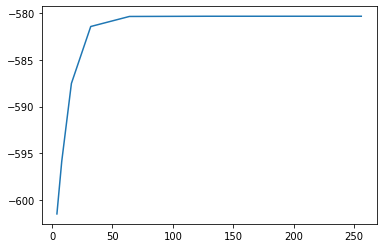

In [19]:
My_list = 2**(np.arange(2,9))
Mx_list = 4*np.ones(len(My_list), dtype=int)

folder = 'results/numerics_verification/fdv/'

E_size_fdv_arr = get_E_arr(Mx_list, My_list, folder, check_sys)
plt.plot(My_list, E_size_fdv_arr.real)

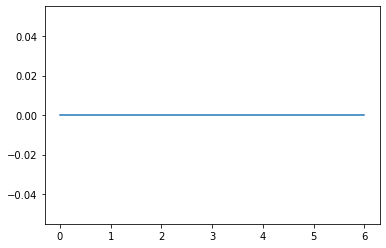

In [20]:
Mx_list = 2**(np.arange(2,9)) 
My_list = np.ones(len(Mx_list), dtype=int)

folder = 'results/numerics_verification/fdh/'

E_size_fdh_arr = get_E_arr(Mx_list, My_list, folder, check_sys)
plt.plot(E_size_fdh_arr.real)

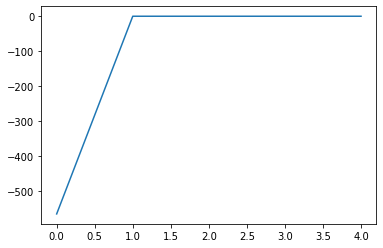

In [9]:
Mx_list = 2**(np.arange(2,7))
My_list = 2**(np.arange(2,7))

folder = 'results/numerics_verification/sp/'

E_size_sp_arr = get_E_arr(Mx_list, My_list, folder, check_sys)
plt.plot(E_size_sp_arr.real)

/tmp/ipykernel_3665/1894439334.py:14: RuntimeWarning: invalid value encountered in divide
  axs.plot(Mx_list**2, ((E_size_fo_arr-E_0_fo)/np.abs(E_0_fo)).real, marker='x', label=r'Ferro Order')
/tmp/ipykernel_3665/1894439334.py:17: RuntimeWarning: invalid value encountered in divide
  axs.plot(Mx_list**2, ((E_size_sp_arr-E_0_sp)/np.abs(E_0_sp)).real, marker='x', label=r'Small Polaron')


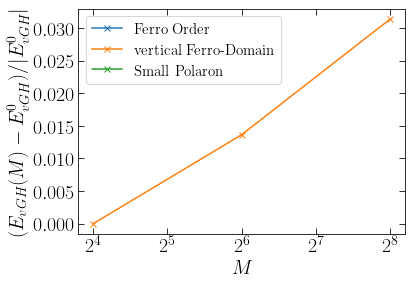

In [50]:
E_0_fo = np.min(E_size_fo_arr)
E_0_fdv = np.min(E_size_fdv_arr)
E_0_fdh = np.min(E_size_fdh_arr)
E_0_sp = np.min(E_size_sp_arr)

A = 6
plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
font_size = 20

fig, axs = plt.subplots()

axs.plot(Mx_list**2, ((E_size_fo_arr-E_0_fo)/np.abs(E_0_fo)).real, marker='x', label=r'Ferro Order')
axs.plot(Mx_list**2, ((E_size_fdv_arr-E_0_fdv)/np.abs(E_0_fdv)).real, marker='x', label=r'vertical Ferro-Domain')
axs.plot(Mx_list**2, ((E_size_fdh_arr-E_0_fdh)/np.abs(E_0_fdh)).real, marker='x', label=r'horizontal Ferro-Domain')
axs.plot(Mx_list**2, ((E_size_sp_arr-E_0_sp)/np.abs(E_0_sp)).real, marker='x', label=r'Small Polaron')


axs.set_xlabel(r'$M$', fontsize=font_size)
axs.set_ylabel(r'$(E_{vGH}(M) - E_{vGH}^0)/|E_{vGH}^0|$', fontsize=font_size)

plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

axs.set_xscale('log', base=2)
#axs.set_yscale('log')

plt.legend(fontsize=15)

plt.tick_params(axis='x', direction='in', length=6, top=True)
plt.tick_params(axis='y', direction='in', length=6, right=True)

plt.tick_params(which='minor', axis='y', direction='in', right=True)

In [59]:
params["tx"] = 95
params["ty"] = 105

params["Mx"] = 4
params["My"] = 20

params["V_0"] = 150

params["tol"] = 1e-7

params["init_choice"] = "ferro_domain_vertical_wall"
psi_fo, E_evo_fo, V, dE_dtx, dE_dty = solve_imag_time_prop(params)

print(E_evo_fo[-1])

-590.9894147463673


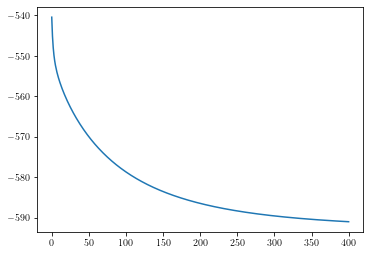

In [60]:
plt.plot(E_evo_fo)

In [ ]:
-511.23328578732463
-507.83382774376736
-517.2529952590743
-533.8882247703789

-520.3000801168042


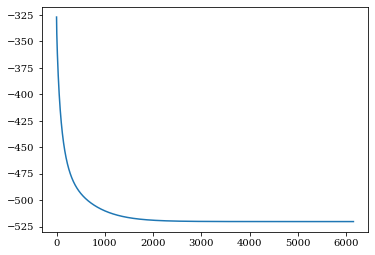

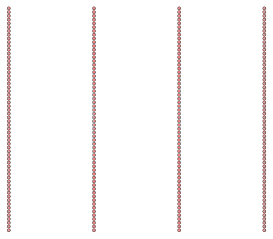

In [44]:
#plt.plot(E_evo_fo1)
plt.plot(E_evo_fo)
print(E_evo_fo[-1])
plot_rotor_wavefunction(x,60,4,np.abs(psi_fo)**2)

In [ ]:
params["init_choice"] = "ferro_domain_vertical_wall"
psi_fdv, E_evo_fdv, V, dE_dtx, dE_dty = solve_imag_time_prop(params)

params["init_choice"] = "ferro_domain_horizontal_wall"
psi_fdh, E_evo_fdh, V, dE_dtx, dE_dty = solve_imag_time_prop(params)

params["init_choice"] = "small_polaron"
psi_sp, E_evo_sp, V, dE_dtx, dE_dty = solve_imag_time_prop(params)

max_psi = np.max(np.array([np.abs(psi_fo)**2,np.abs(psi_fdv)**2,np.abs(psi_fdh)**2,np.abs(psi_sp)**2])).real